# K- Means

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [81]:
x,y = make_blobs(n_samples=500,n_features=2,centers=5,random_state=3)

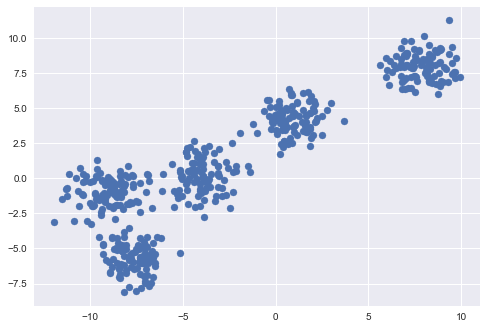

In [82]:
plt.style.use('seaborn')
plt.figure(0)
plt.scatter(x[:,0],x[:,1])
plt.show()

In [83]:
k = 5
color = ["green","red","blue","yellow","orange"]
clusters = {}
for i in range(k):
    center = 5*(2*np.random.random((x.shape[1],))-1)
    points = []
    cluster = {
        'center': center,
        'points': points,
        'color': color[i]
    }

    clusters[i] = cluster

In [84]:
print(center)

[1.59250642 1.65027812]


In [85]:
clusters

{0: {'center': array([-4.80855302,  2.38471446]),
  'points': [],
  'color': 'green'},
 1: {'center': array([-4.7741073 , -3.15943785]),
  'points': [],
  'color': 'red'},
 2: {'center': array([ 2.36251033, -0.12579533]),
  'points': [],
  'color': 'blue'},
 3: {'center': array([ 1.68074244, -1.36724539]),
  'points': [],
  'color': 'yellow'},
 4: {'center': array([1.59250642, 1.65027812]),
  'points': [],
  'color': 'orange'}}

In [86]:
def distance(v1,v2):
    return np.sqrt(np.sum((v1-v2)**2))

In [87]:

# Assign every data point to one of the clusters
def assignPointToClusters(clusters): #E-Step
    for ix in range(x.shape[0]):
        dist = []
        curr_x = x[ix]

        for kx in range(k):
            d = distance(curr_x,clusters[kx]['center'])
            dist.append(d)

        current_cluster = np.argmin(dist)    
        clusters[current_cluster]['points'].append(curr_x)
        
def updateClusters(clusters): # M-Step -> We update every cluster center according to the mean of the points in it
    for kx in range(k):
        pts = np.array(clusters[kx]['points'])
        
        if pts.shape[0]>0: #If a cluster has some-nonzero points
            new_u = pts.mean(axis=0)
            clusters[kx]['center'] = new_u
            clusters[kx]['points'] = [] #Clear the list 
                    
    

def plotClusters(clusters):
    
    for kx in range(k):
        
        pts = np.array(clusters[kx]['points'])        
        try:
            plt.scatter(pts[:,0],pts[:,1],color=clusters[kx]['color'])
        except:
            pass
        
        #Plot the cluster center
        uk = clusters[kx]['center']
        plt.scatter(uk[0],uk[1],color="black",marker="o")
   
    

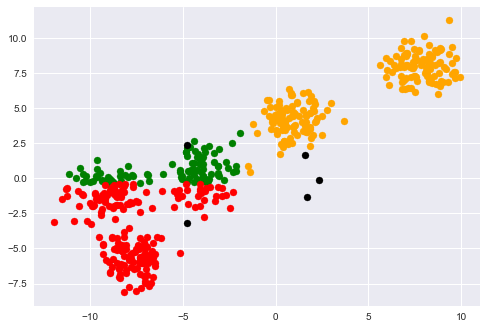

In [88]:
assignPointToClusters(clusters)
plotClusters(clusters)

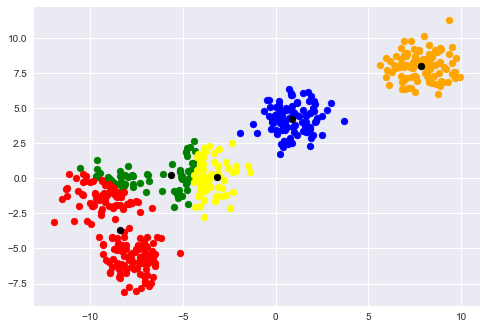

In [93]:
assignPointToClusters(clusters)
plotClusters(clusters)
updateClusters(clusters)